In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('./dataBacktesting.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close               CloseNext                    High  \
Symbol             IBM         PEP         IBM         PEP         IBM   
1985-03-01   14.030176    1.134058   13.939824    1.132171   14.120527   
1985-03-04   13.939824    1.132171   13.939824    1.155759   14.081804   
1985-03-05   13.939824    1.155759   13.720400    1.138069   14.030175   
1985-03-06   13.720400    1.138069   13.436437    1.135119   13.991452   
1985-03-07   13.436437    1.135119   13.384818    1.132171   13.772025   
...                ...         ...         ...         ...         ...   
2021-04-23  140.856171  145.830002  140.005692  143.360001  142.023140   
2021-04-26  140.005692  143.360001  140.440826  142.889999  142.042927   
2021-04-27  140.440826  142.889999  141.419891  141.830002  140.984752   
2021-04-28  141.419891  141.830002  142.646194  143.940002  141.815465   
2021-04-29  142.646194  143.940002         NaN         NaN  147.096471   

Attributes                     Low                    Open              \
Symbol             PEP         IBM         PEP         IBM         PEP   
1985-03-01    1.145750   13.836567    1.116522   13.888196    1.122367   
1985-03-04    1.143964   13.875288    1.126275   14.068897    1.138068   
1985-03-05    1.161655   13.901102    1.132172   13.978546    1.135120   
1985-03-06    1.158708   13.707493    1.135120   13.952730    1.155759   
1985-03-07    1.143964   13.423529    1.123326   13.668767    1.132171   
...                ...         ...         ...         ...         ...   
2021-04-23  146.339996  139.392529  145.059998  139.748551  145.509995   
2021-04-26  145.770004  139.916675  142.979996  140.846290  145.550003   
2021-04-27  143.179993  139.194754  142.130005  140.124370  142.619995   
2021-04-28  143.690002  140.529842  141.729996  141.340774  143.490005   
2021-04-29  144.429993  141.400107  141.970001  142.537409  142.100006   

Attributes   Volume                bop                 ema20              \
Symbol          IBM      PEP       IBM       PEP         IBM         PEP   
1985-03-01  5532000  3880800  0.500000  0.399990   14.030176    1.134058   
1985-03-04  3560400  3142800 -0.625000 -0.333343   14.021571    1.133879   
1985-03-05  4040000  5153400 -0.300000  0.700006   14.013786    1.135962   
1985-03-06  4120000  3722400 -0.818182 -0.749982   13.985844    1.136163   
1985-03-07  7028000  4624200 -0.666667  0.142847   13.933520    1.136064   
...             ...      ...       ...       ...         ...         ...   
2021-04-23  4556000  4354700  0.421050  0.250006  133.983197  143.003346   
2021-04-26  4710800  5817700 -0.395343 -0.784945  134.556768  143.037313   
2021-04-27  3884000  4693700  0.176791  0.257150  135.117154  143.023283   
2021-04-28  3768100  4962700  0.061540 -0.846938  135.717415  142.909637   
2021-04-29  4353900  4699900  0.019097  0.747969  136.377299  143.007767   

Attributes      ema200                   lower                    ma20  \
Symbol             IBM         PEP         IBM         PEP         IBM   
1985-03-01   14.030176    1.134058         NaN         NaN         NaN   
1985-03-04   14.029277    1.134040         NaN         NaN         NaN   
1985-03-05   14.028387    1.134256         NaN         NaN         NaN   
1985-03-06   14.025323    1.134294         NaN         NaN         NaN   
1985-03-07   14.019463    1.134302         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2021-04-23  122.718700  136.941129  127.509733  140.396457  134.125881   
2021-04-26  122.890710  137.004998  127.265145  140.455211  134.382513   
2021-04-27  123.065338  137.063556  127.071209  140.392265  134.686616   
2021-04-28  123.247970  137.110983  126.948194  140.293812  135.096041   
2021-04-29  123.440987  137.178933  126.987805  140.564317  135.638976   

Attributes                  macd            momentum              signal  \
Symbol             PEP       IBM       PEP    

In [3]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock PEP
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64


In [4]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2021-04-29']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [5]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [6]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [7]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

In [8]:
data.drop(data.index[data.index.get_loc('2021-04-01'):], axis=0, inplace=True)

In [9]:
data

Attributes       Close               CloseNext               Volume           \
Symbol             IBM         PEP         IBM         PEP      IBM      PEP   
1985-03-05   13.939824    1.155759   13.720400    1.138069  4040000  5153400   
1985-03-06   13.720400    1.138069   13.436437    1.135119  4120000  3722400   
1985-03-07   13.436437    1.135119   13.384818    1.132171  7028000  4624200   
1985-03-08   13.384818    1.132171   13.578421    1.135119  6892000  2764800   
1985-03-11   13.578421    1.135119   13.617147    1.149862  4204000  1609200   
...                ...         ...         ...         ...      ...      ...   
2021-03-25  131.599625  139.630005  134.873047  142.699997  5554000  5827600   
2021-03-26  134.873047  142.699997  134.358780  144.809998  5567600  6785600   
2021-03-29  134.358780  144.809998  133.231384  142.539993  4622700  6105800   
2021-03-30  133.231384  142.539993  131.787506  141.449997  4790400  4372700   
2021-03-31  131.787506  141.449997  131.757843  141.279999  4945100  6257900   

Attributes       bop                ema200                  macd            \
Symbol           IBM       PEP         IBM         PEP       IBM       PEP   
1985-03-05 -0.300000  0.700006   14.028387    1.134256 -0.012772  0.001615   
1985-03-06 -0.818182 -0.749982   14.025323    1.134294 -0.034491  0.001568   
1985-03-07 -0.666667  0.142847   14.019463    1.134302 -0.073766  0.001279   
1985-03-08 -0.466667 -0.400007   14.013148    1.134281 -0.107814  0.000802   
1985-03-11  0.812500 -0.333371   14.008822    1.134289 -0.117817  0.000655   
...              ...       ...         ...         ...       ...       ...   
2021-03-25  0.789627  0.235608  120.173539  135.452192  2.532394  1.117782   
2021-03-26  0.919646  0.795867  120.319802  135.524310  2.919567  1.577161   
2021-03-29 -0.076919  0.763778  120.459494  135.616705  3.148612  2.087419   
2021-03-30 -0.506666 -0.433459  120.586577  135.685593  3.202247  2.282323   
2021-03-31 -0.639999 -0.865744  120.698029  135.742950  3.092595  2.322064   

Attributes  momentum              signal              std20d            
Symbol           IBM       PEP       IBM       PEP       IBM       PEP  
1985-03-05  0.000000  0.023587 -0.003708  0.000299  0.324364  0.047906  
1985-03-06 -0.219424 -0.017689 -0.009864  0.000553  0.324364  0.047906  
1985-03-07 -0.283963 -0.002950 -0.022645  0.000698  0.324364  0.047906  
1985-03-08 -0.051619 -0.002948 -0.039678  0.000719  0.324364  0.047906  
1985-03-11  0.193603  0.002948 -0.055306  0.000706  0.324364  0.047906  
...              ...       ...       ...       ...       ...       ...  
2021-03-25  2.422943  0.820007  2.005483  0.046248  4.155823  3.492027  
2021-03-26  3.273422  3.069992  2.188299  0.352431  4.345533  3.866542  
2021-03-29 -0.514267  2.110001  2.380362  0.699429  4.474108  4.412754  
2021-03-30 -1.127396 -2.270004  2.544739  1.016007  4.342329  4.590686  
2021-03-31 -1.443878 -1.089996  2.654310  1.277219  4.193578  4.445989  

[9093 rows x 18 columns]

## 1) Modelo donde escalamos las variables independientes y la dependiente

In [10]:
params = {
    "kernel": 'linear',
    "C":5.0,
    "epsilon": 0.001,
    
}
svr = SVR(kernel=params['kernel'], C=params['C'], epsilon=params['epsilon'])

## separar los datos manualmente

In [11]:
data_train_scaler = data.drop(data.index[data.index.get_loc('2020-09-30'):], axis=0)
data_test_scaler = data.drop(data.index[:data.index.get_loc('2020-09-30')], axis=0)
#2021-03-31

## all stocks

In [12]:
PRED=codeM.allStockManually(data_train_scaler,data_test_scaler,svr,8, isScaled=True)
#136.44949449

'PEP'

mae: 1.1457693254214536
rmse: 1.4991642701602255


'IBM'

mae: 1.515174308729022
rmse: 2.2296807599461026


In [13]:
PRED=[[136.44949449, 138.58383694, 135.9428531 , 135.81166618,
        133.65627167, 134.91976676, 135.73816337, 136.31270987,
        139.88531541, 141.26418402, 140.28488716, 139.23216955,
        139.52195164, 137.54366083, 137.56936222, 137.46650396,
        137.47814658, 137.43194378, 135.9834284 , 137.00654844,
        132.22271499, 132.03562954, 131.35827878, 133.1547446 ,
        134.98861496, 135.78709884, 135.97424434, 136.29572457,
        136.36435243, 139.53028186, 141.65078958, 141.60242394,
        142.4481267 , 143.46999081, 142.97481693, 141.17726475,
        141.11862914, 141.21866415, 140.8357419 , 141.81528622,
        141.94729704, 142.37713921, 142.02320887, 143.80597597,
        142.41192355, 143.24308482, 144.61351793, 144.15293596,
        144.30194644, 144.4719233 , 143.48208063, 143.7767959 ,
        143.05913382, 143.58710889, 143.70912585, 144.51190105,
        145.70487432, 144.22323275, 142.87776211, 143.2569674 ,
        143.89511581, 145.70220662, 146.207366  , 146.10588442,
        147.07451092, 143.15409932, 143.56559188, 141.84616665,
        141.3945276 , 143.06176414, 141.03229663, 140.38535255,
        141.51573833, 140.7119392 , 140.35037617, 141.00271253,
        140.29562424, 138.61869035, 137.62081898, 139.16842702,
        140.75117918, 137.09347025, 138.20345105, 135.65428856,
        136.04668911, 137.41173351, 137.06508216, 138.68161664,
        139.9329007 , 139.39170443, 138.61136655, 136.75835264,
        134.09376255, 133.01415934, 133.50723386, 133.58648336,
        134.47211051, 131.6860608 , 131.17000932, 131.93586531,
        131.26473332, 129.22382348, 128.42526432, 129.81407181,
        130.25430091, 128.37196327, 129.06314013, 133.18682542,
        132.31333395, 132.42690547, 133.73268074, 133.38289575,
        133.20419901, 133.1929289 , 134.15533987, 133.7737992 ,
        132.70280758, 134.63147811, 137.87937192, 139.5201885 ,
        138.8884385 , 139.69347075, 142.71255242, 144.79668526,
        142.57730498, 141.50265163], [117.12217905, 116.56075744, 116.05276462, 117.44715774,
        117.41329158, 119.44838949, 126.6543605 , 123.09352111,
        122.51838978, 120.4713363 , 121.27843033, 120.26386044,
        121.2696965 , 120.87737016, 112.97540441, 110.7081452 ,
        111.37887569, 111.6148088 , 107.95182747, 106.329925  ,
        102.53433349, 104.71089527, 107.38358776, 108.60379804,
        109.81795937, 107.62916063, 110.39947577, 109.69980772,
        112.76331509, 115.1118447 , 114.42020722, 111.75956904,
        114.05822028, 115.55032687, 114.90623056, 113.98959059,
        114.38894387, 114.15536056, 117.25236484, 121.52392159,
        121.32250611, 121.46967476, 120.65478678, 120.2983631 ,
        121.73329189, 120.74607379, 124.27410293, 121.82939763,
        122.81405677, 123.88126529, 122.08692182, 121.40101957,
        120.67183568, 123.0295808 , 122.66534587, 122.6637438 ,
        122.95782458, 120.53794488, 120.74486851, 121.0317153 ,
        121.81064783, 121.94158825, 120.93957776, 121.46632077,
        122.98317639, 121.08201933, 123.23826206, 126.34629565,
        126.06414984, 125.61109317, 125.65957715, 126.28098406,
        124.03225893, 126.04111272, 125.47918326, 126.09831631,
        127.14432362, 128.69348564, 115.87674814, 115.80241353,
        119.64877411, 119.64408742, 117.29433398, 116.33211757,
        117.73458814, 116.65787717, 116.33917639, 118.20574407,
        118.96877785, 120.76074362, 120.88619601, 121.02564328,
        119.70027692, 119.58462439, 118.85599992, 118.75225977,
        119.50824617, 117.77401149, 119.62998829, 119.48757883,
        121.97861271, 121.25125417, 117.72049917, 119.51074118,
        119.10893447, 121.13004318, 118.89498957, 121.59743578,
        123.58184084, 122.96229889, 126.63904967, 125.92707615,
        126.39357362, 127.36369526, 127.03050446, 127.81813577,
        128.84961366, 127.69922427, 129.34020075, 129.25868019,
        129.41987294, 131.86396308, 135.17411656, 134.67041037,
        133.5339671 , 132.07623935]]

In [14]:
serie = data_test_scaler.xs('PEP', level=1, axis=1)
attributes= ('CloseNext','Volume', 'bop','ema200', 'macd', 'momentum','signal', 'std20d')
for i in attributes:
    serie=serie.drop([i], axis=1)
serie['Predict'] = PRED[0]

In [15]:
serie

Attributes,Close,Predict
2020-09-30,136.529419,136.449494
2020-10-01,138.696548,138.583837
2020-10-02,135.997482,135.942853
2020-10-05,135.869415,135.811666
2020-10-06,133.672729,133.656272
...,...,...
2021-03-25,139.630005,139.693471
2021-03-26,142.699997,142.712552
2021-03-29,144.809998,144.796685
2021-03-30,142.539993,142.577305


In [16]:
def backtesting(prices_df, init_capital, verbose=False):
    data_signal = pd.DataFrame(index=prices_df.index)
    data_signal['price'] = prices_df.Close
    data_signal['daily_difference'] = prices_df.Predict - data_signal['price'] 
    data_signal['signal'] = 0.0
    data_signal['signal'][:] = np.where(data_signal['daily_difference'][:] > 0, 1.0, 0.0)   # If prediction for the next day is greater than the actual price buy (signal 1)
                                                                                            # Else, sell (signal 0)

    data_signal['positions'] = data_signal['signal'].diff()                                 # By making the difference of the signals the algorithm will not overbuy or oversell the same stock
 
    positions = pd.DataFrame(index=data_signal.index).fillna(0.0)
    portfolio = pd.DataFrame(index=data_signal.index).fillna(0.0)
    #data_signal['positions']=data_signal['positions'].abs()
    positions['stock'] = data_signal['signal']

    portfolio['positions'] = (positions.multiply(data_signal['price'], axis=0))             # Multiply the signal (1 or 0) to indicate with money if they have a position or not
    pos_diff = positions.diff()
    pos_diff['stock'][0] = 1.0 if data_signal['signal'][0] == 1.0 else 0.0                  # Indicates to the algorithm that the first signal is approved
    portfolio['cash'] = init_capital - (pos_diff.multiply(data_signal['price'], axis=0)).cumsum()
    portfolio['total'] = portfolio['positions'] + portfolio['cash']

    if verbose:
        print(data_signal,'\n')
        print(positions,'\n')
        print(portfolio,'\n')

    return portfolio

In [17]:
result=backtesting(serie, 1000, verbose=True)

                 price  daily_difference  signal  positions
2020-09-30  136.529419         -0.079924     0.0        NaN
2020-10-01  138.696548         -0.112712     0.0        0.0
2020-10-02  135.997482         -0.054629     0.0        0.0
2020-10-05  135.869415         -0.057749     0.0        0.0
2020-10-06  133.672729         -0.016458     0.0        0.0
...                ...               ...     ...        ...
2021-03-25  139.630005          0.063466     1.0        0.0
2021-03-26  142.699997          0.012555     1.0        0.0
2021-03-29  144.809998         -0.013312     0.0       -1.0
2021-03-30  142.539993          0.037312     1.0        1.0
2021-03-31  141.449997          0.052655     1.0        0.0

[126 rows x 4 columns] 

            stock
2020-09-30    0.0
2020-10-01    0.0
2020-10-02    0.0
2020-10-05    0.0
2020-10-06    0.0
...           ...
2021-03-25    1.0
2021-03-26    1.0
2021-03-29    0.0
2021-03-30    1.0
2021-03-31    1.0

[126 rows x 1 columns] 

            

In [18]:
result

,positions,cash,total
2020-09-30,0.000000,1000.000000,1000.000000
2020-10-01,0.000000,1000.000000,1000.000000
2020-10-02,0.000000,1000.000000,1000.000000
2020-10-05,0.000000,1000.000000,1000.000000
2020-10-06,0.000000,1000.000000,1000.000000
...,...,...,...
2021-03-25,139.630005,859.699982,999.329987
2021-03-26,142.699997,859.699982,1002.399979
2021-03-29,0.000000,1004.509979,1004.509979
2021-03-30,142.539993,861.969986,1004.509979


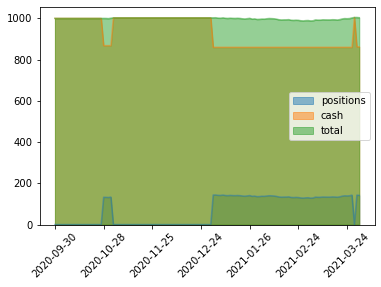

In [19]:
result.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()

In [20]:
serie = data_test_scaler.xs('IBM', level=1, axis=1)
attributes= ('CloseNext','Volume', 'bop','ema200', 'macd', 'momentum','signal', 'std20d')
for i in attributes:
    serie=serie.drop([i], axis=1)
serie['Predict'] = PRED[1]

In [21]:
result=backtesting(serie, 1000)
result

,positions,cash,total
2020-09-30,117.041725,882.958275,1000.000000
2020-10-01,116.483788,882.958275,999.442062
2020-10-02,115.983566,882.958275,998.941841
2020-10-05,117.368790,882.958275,1000.327065
2020-10-06,117.330315,882.958275,1000.288589
...,...,...,...
2021-03-25,131.599625,874.391777,1005.991402
2021-03-26,134.873047,874.391777,1009.264824
2021-03-29,134.358780,874.391777,1008.750557
2021-03-30,133.231384,874.391777,1007.623161


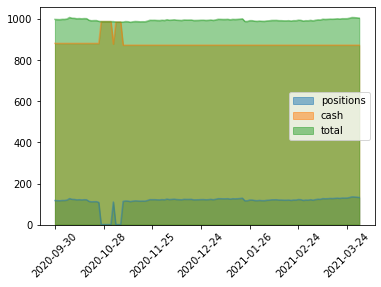

In [22]:
result.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()